# 취약 모델 제작파트

1. 기존 모델에서 수정 전 sro, context + sro 둘다 맞추는 데이터 탐색
2. 수정 후 sro는 맞고 context + sro는 틀리는 데이터 탐색
3. 해당 모델의 내부 attention check

In [ ]:
import os
from easyeditor import BaseEditor
from easyeditor import MEMITHyperParams

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

current_directory = os.getcwd()

print("현재 작업 디렉토리:", current_directory)

%cd ../


In [ ]:
    {
        "case_id": 15883,
        "prompt": "Steve Jobs, who is employed by",
        "target_new": "IBM",
        "subject": "Steve Jobs",
        "ground_truth": "Apple",
        "rephrase_prompt": "Steve Jobs's greatest accomplishment is",
        "locality_prompt": "Guy Kawasaki, who is employed by",
        "locality_ground_truth": "Apple"
    },

In [ ]:
hparams=MEMITHyperParams.from_hparams('./hparams/MEMIT/gpt2-xl.yaml')
prompts= ['Steve Jobs, who is employed by']
ground_truth= ['Apple'] 
target_new= ['IBM']
subject= ['Steve Jobs']
editor=BaseEditor.from_hparams(hparams)

In [ ]:
#改变模型参数
metrics, edited_model_false, abc = editor.edit(
    prompts=prompts,
    ground_truth=ground_truth,
    target_new=target_new,
    subject=subject,
    keep_original_weight=True,
    sequential_edit=True,
)
print(metrics)

In [ ]:
#测试模型编辑效果(使用第一种编辑模型的方式)
edited_model=edited_model_false

**Reliability Test**

In [ ]:
from transformers import GPT2Tokenizer
from transformers import GPT2LMHeadModel
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl')
tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.padding_side='left'

edited_model.save_pretrained('steve_jobs')
tokenizer.save_pretrained('steve_jobs')

# 여기부터

In [1]:
import os
from transformers import GPT2Tokenizer
from transformers import GPT2LMHeadModel


os.environ["CUDA_VISIBLE_DEVICES"] = "2"

current_directory = os.getcwd()
print("현재 작업 디렉토리:", current_directory)
%cd ../

from easyeditor import BaseEditor
from easyeditor import MEMITHyperParams


현재 작업 디렉토리: /home/gyubin/EasyEdit/tutorial-notebooks
/home/gyubin/EasyEdit


/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl')
tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.padding_side='left'



model = GPT2LMHeadModel.from_pretrained('gpt2-xl').to('cuda')
my_model = GPT2LMHeadModel.from_pretrained('steve_jobs').to('cuda')

/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
text = ['hello my boy. I am a ']
inputs = tokenizer(text, return_tensors='pt')
inputs = {key: value.to('cuda') for key, value in inputs.items()}

# 토큰 ID를 단어로 디코딩
input_ids = inputs['input_ids']
decoded_tokens = tokenizer.decode(input_ids[0], skip_special_tokens=True)
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

print("Decoded tokens:")
print(decoded_tokens)

print("\nToken IDs to Tokens:")
for token_id, token in zip(input_ids[0].tolist(), tokens):
    print(f"Token ID: {token_id} -> Token: {token}")
    
    
# model.config.output_attentions = True
model.config.output_attentions = True
outputs_a = model(**inputs)


Decoded tokens:
hello my boy. I am a 

Token IDs to Tokens:
Token ID: 31373 -> Token: hello
Token ID: 616 -> Token: Ġmy
Token ID: 2933 -> Token: Ġboy
Token ID: 13 -> Token: .
Token ID: 314 -> Token: ĠI
Token ID: 716 -> Token: Ġam
Token ID: 257 -> Token: Ġa
Token ID: 220 -> Token: Ġ


In [4]:
outputs_a.attentions[-15].squeeze()

tensor([[[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [9.9449e-01, 5.5127e-03, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [9.9615e-01, 3.1181e-03, 7.3690e-04,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         ...,
         [9.5595e-01, 1.2284e-02, 3.6986e-03,  ..., 5.1883e-03,
          0.0000e+00, 0.0000e+00],
         [9.6643e-01, 6.9202e-03, 5.7462e-03,  ..., 3.2437e-03,
          1.2786e-03, 0.0000e+00],
         [7.1190e-01, 2.3767e-02, 3.2747e-02,  ..., 1.7144e-02,
          6.4576e-03, 5.6693e-02]],

        [[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [9.8440e-01, 1.5600e-02, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [9.5000e-01, 1.7821e-02, 3.2183e-02,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         ...,
         [8.5481e-01, 8.9086e-03, 9.3975e-02,  ..., 8.8939e-03,
          0.000

In [5]:
outputs_b.attentions[15].squeeze()

NameError: name 'outputs_b' is not defined

In [ ]:
# 생성 체크

correct_prompts = [
    "Steve Jobs, who is employed by",
    "Steve Jobs was the founder of NeXT. And he is employed by",
    "Steve Jobs was an American business man. And he is employed by",
    "Apple is an American multinational corporation. And Steve Jobs is employed by"
]


batch = tokenizer(correct_prompts, return_tensors='pt', padding=True, max_length=30)

#模型编辑之前
pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_length=30
)
#模型编辑之后
post_edit_outputs = my_model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_length=30
)
print('Pre-Edit Outputs: ', [tokenizer.decode(x) for x in pre_edit_outputs.detach().cpu().numpy().tolist()])
print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])

# Attention Test

In [34]:
# i번째 layer의 attention matrix(head 평균)
def print_tensor(attention, i):
    tensor = attention[i].squeeze().mean(dim=0)
    for row in tensor:
        print(' '.join(f'{val:.4f}' for val in row))


In [6]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
# 시퀀스 길이와 레이어 수 정의
# 입력 텍스트
# k = 1이면 0번 sequence 제거, 0이면 포함
def heatmap(text, tokenizer, model,k):
    inputs = tokenizer(text, return_tensors='pt')
    inputs = {key: value.to('cuda') for key, value in inputs.items()}

    # 토큰 ID를 단어로 디코딩
    input_ids = inputs['input_ids']
    decoded_tokens = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

    print("Decoded tokens:")
    print(decoded_tokens)

    print("\nToken IDs to Tokens:")
    for token_id, token in zip(input_ids[0].tolist(), tokens):
        print(f"Token ID: {token_id} -> Token: {token}")
        
        
    model.config.output_attentions = True

    outputs = model(**inputs)
    attention_values = outputs.attentions

    sequence_length = inputs['input_ids'].shape[1]  # 13
    num_layers = len(attention_values)  # 48
    num_heads = attention_values[0].shape[1]  # 25
    post_edit_outputs = model.generate(
        input_ids=inputs['input_ids'].to('cuda'),
        attention_mask=inputs['attention_mask'].to('cuda'),
        max_length=30
    )
    
    print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])
        
    # 히트맵 데이터 초기화
    heatmap_data = torch.zeros((num_layers, sequence_length-k))

    # 히트맵 데이터 계산
    for layer_index, attention_layer in enumerate(attention_values):
        # (batch_size, num_heads, sequence_length, sequence_length)
        attention_layer_mean = attention_layer.mean(dim=1)  # (batch_size, sequence_length, sequence_length)
        attention_layer_mean = attention_layer_mean.squeeze(0)  # (sequence_length, sequence_length)
        
        # 마지막 포지션에 대한 attention 값 추출
        attention_to_last_position = attention_layer_mean[-1]  # (sequence_length,)
        
        # 각 레이어의 가로와 세로의 평균값 계산
        heatmap_data[layer_index, :] = attention_to_last_position[k:]

    # 히트맵 데이터 행렬로 변환
    heatmap_data_np = heatmap_data.detach().cpu().numpy()
    # 히트맵 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data_np, cmap='viridis', cbar=True, xticklabels=range(sequence_length-k), yticklabels=range(num_layers))
    plt.xlabel('Position in Sequence')
    plt.ylabel('Layer')
    plt.title('Attention Heatmap for Each Layer Focusing on Last Position')
    plt.show()
    return attention_values

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Decoded tokens:
s a f g

Token IDs to Tokens:
Token ID: 82 -> Token: s
Token ID: 257 -> Token: Ġa
Token ID: 277 -> Token: Ġf
Token ID: 308 -> Token: Ġg
Post-Edit Outputs:  ['s a f g h i j k l m n o p q r s t u v w x y z a_ b_ c_ d']


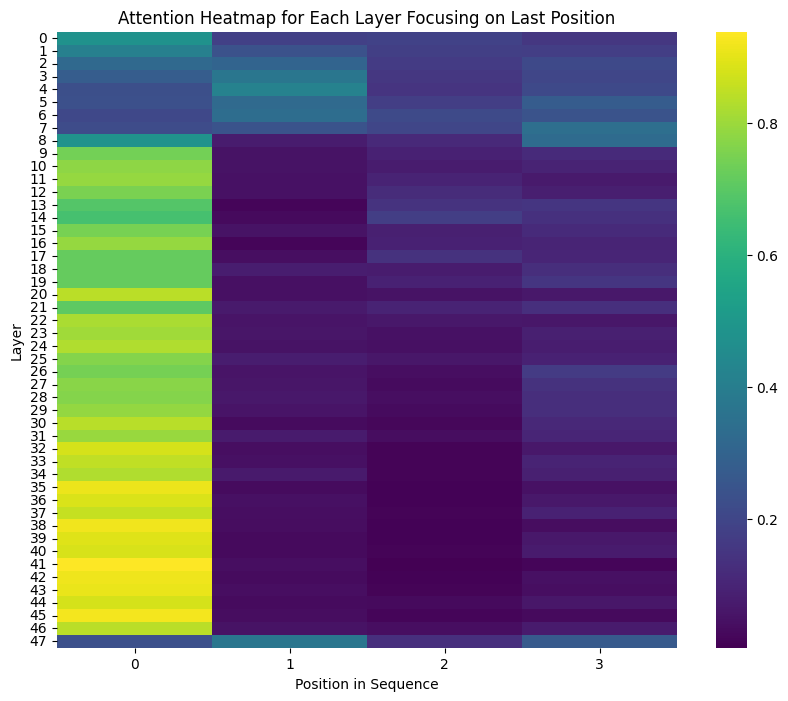

In [7]:
text = ["s a f g"]
pre_attention = heatmap(text, tokenizer, my_model,k=0)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Decoded tokens:
The Apple is an American multinational corporation. And Steve Jobs is employed by

Token IDs to Tokens:
Token ID: 464 -> Token: The
Token ID: 4196 -> Token: ĠApple
Token ID: 318 -> Token: Ġis
Token ID: 281 -> Token: Ġan
Token ID: 1605 -> Token: ĠAmerican
Token ID: 28061 -> Token: Ġmultinational
Token ID: 12017 -> Token: Ġcorporation
Token ID: 13 -> Token: .
Token ID: 843 -> Token: ĠAnd
Token ID: 6542 -> Token: ĠSteve
Token ID: 19161 -> Token: ĠJobs
Token ID: 318 -> Token: Ġis
Token ID: 9322 -> Token: Ġemployed
Token ID: 416 -> Token: Ġby
Post-Edit Outputs:  ['The Apple is an American multinational corporation. And Steve Jobs is employed by Apple.\n\nThe Apple is a multinational corporation. And Steve Jobs is employed']


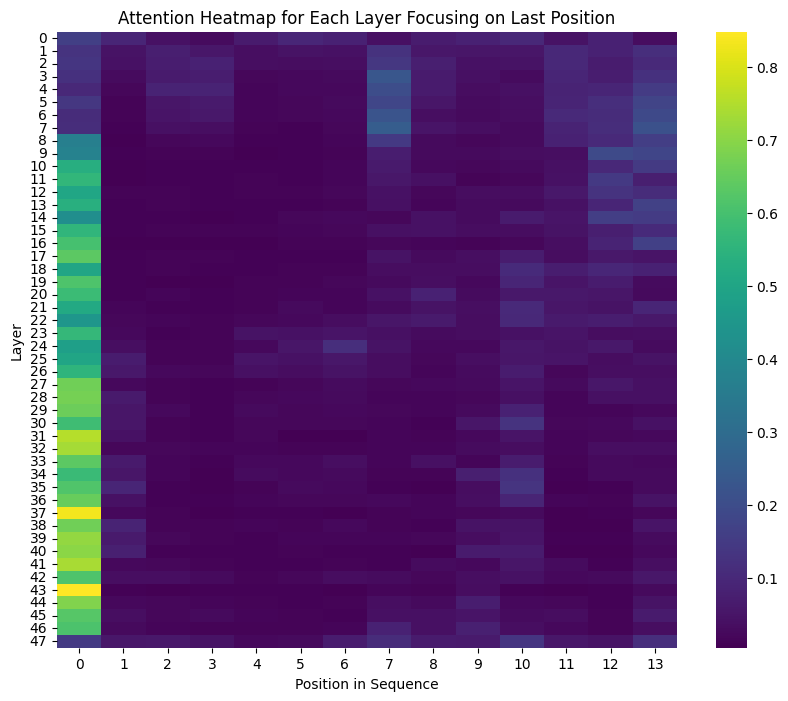

In [9]:
text = ["The Apple is an American multinational corporation. And Steve Jobs is employed by"]
edited_attention = heatmap(text, tokenizer, my_model, k=0)

In [43]:
print_tensor(edited_attention,25)

1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.9631 0.0369 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.8686 0.0894 0.0420 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.8563 0.0665 0.0477 0.0296 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.7669 0.0789 0.0379 0.0596 0.0567 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.7740 0.0594 0.0153 0.0285 0.0667 0.0562 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.7558 0.0479 0.0145 0.0330 0.0599 0.0538 0.0351 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.6569 0.0538 0.0287 0.0369 0.0486 0.0662 0.0666 0.0423 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.6076 0.0539 0.0346 0.0321 0.0471 0.0656 0.0637 0.0579 0.0375 0.0000 0.0000 0.0000 0.0000 0.0000
0.7171 0.0496 0.0168 0.0102 0.0107 0.0127 0.0200 0.0293 0.0590 0.0747 0.0000 0.0000 0.0000 0.0000
0.6937 0.0186 0.0108

In [ ]:

i = 0
# 텐서를 출력합니다.
print_tensor(edited_attention, i)

1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.7588 0.2412 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.6492 0.2246 0.1262 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.5923 0.1483 0.1217 0.1377 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.4506 0.1524 0.1437 0.1434 0.1100 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.4271 0.0929 0.0802 0.1374 0.1546 0.1079 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.3707 0.0924 0.0747 0.1043 0.1532 0.1438 0.0608 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.3380 0.0886 0.0675 0.1019 0.1279 0.1206 0.0704 0.0851 0.0000 0.0000 0.0000 0.0000 0.0000
0.2887 0.0868 0.0696 0.0892 0.1173 0.1127 0.0632 0.0805 0.0920 0.0000 0.0000 0.0000 0.0000
0.2886 0.0627 0.0616 0.0957 0.1136 0.1009 0.0493 0.0593 0.0885 0.0797 0.0000 0.0000 0.0000
0.2323 0.0518 0.0381 0.0749 0.1108 0.1025 0.0432 0.0812 0.0990 0.1200 0.0463 0.0000 0.0000

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
# 시퀀스 길이와 레이어 수 정의
# 입력 텍스트

def heatmap(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors='pt')
    inputs = {key: value.to('cuda') for key, value in inputs.items()}

    # 토큰 ID를 단어로 디코딩
    input_ids = inputs['input_ids']
    decoded_tokens = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

    print("Decoded tokens:")
    print(decoded_tokens)

    print("\nToken IDs to Tokens:")
    for token_id, token in zip(input_ids[0].tolist(), tokens):
        print(f"Token ID: {token_id} -> Token: {token}")
        
        
    model.config.output_attentions = True

    outputs = model(**inputs)
    attention_values = outputs.attentions

    sequence_length = inputs['input_ids'].shape[1]  # 13
    num_layers = len(attention_values)  # 48
    num_heads = attention_values[0].shape[1]  # 25
    post_edit_outputs = model.generate(
        input_ids=inputs['input_ids'].to('cuda'),
        attention_mask=inputs['attention_mask'].to('cuda'),
        max_length=30
    )
    
    print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])
        
    # 히트맵 데이터 초기화
    heatmap_data = torch.zeros((num_layers, sequence_length))

    # 히트맵 데이터 계산
    for layer_index, attention_layer in enumerate(attention_values):
        # (batch_size, num_heads, sequence_length, sequence_length)
        attention_layer_mean = attention_layer.mean(dim=1)  # (batch_size, sequence_length, sequence_length)
        attention_layer_mean = attention_layer_mean.squeeze(0)  # (sequence_length, sequence_length)
        
        # 마지막 포지션에 대한 attention 값 추출
        attention_to_last_position = attention_layer_mean[-1]  # (sequence_length,)
        
        # 각 레이어의 가로와 세로의 평균값 계산
        heatmap_data[layer_index, :] = attention_to_last_position

    # 히트맵 데이터 행렬로 변환
    heatmap_data_np = heatmap_data.detach().cpu().numpy()
    # 히트맵 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data_np, cmap='viridis', cbar=True, xticklabels=range(sequence_length), yticklabels=range(num_layers))
    plt.xlabel('Position in Sequence')
    plt.ylabel('Layer')
    plt.title('Attention Heatmap for Each Layer Focusing on Last Position')
    plt.show()
    return attention_values

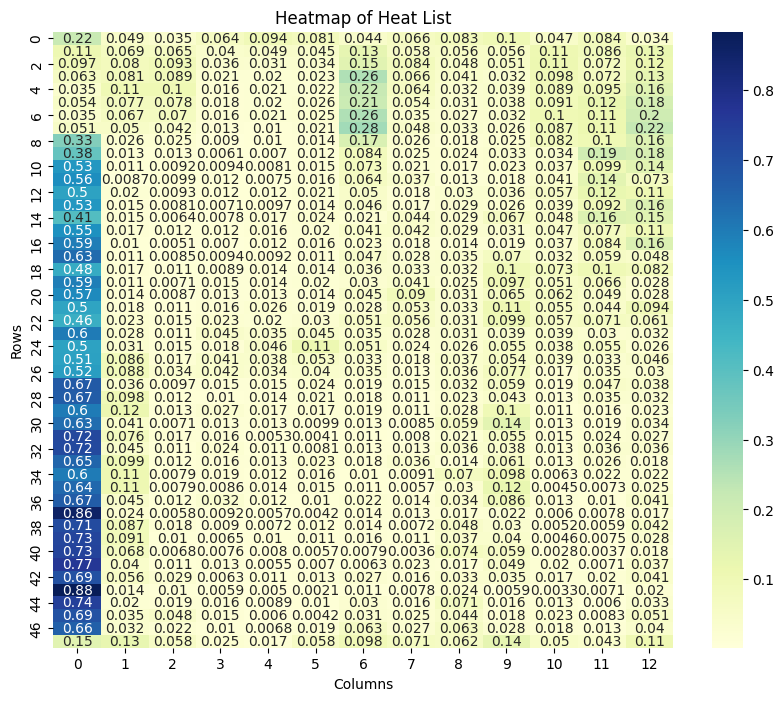

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
heat_list = []
for i in range(len(edited_attention)):
    heat_list.append(edited_attention[i].squeeze().mean(dim = 0)[-1].detach().cpu().numpy())
# 데이터를 NumPy 배열로 변환
data = np.array(heat_list)

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap='YlGnBu', cbar=True)

# 제목 및 레이블 설정
plt.title('Heatmap of Heat List')
plt.xlabel('Columns')
plt.ylabel('Rows')

# 그래프 표시
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
# 시퀀스 길이와 레이어 수 정의
# 입력 텍스트

def heatmap(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors='pt')
    inputs = {key: value.to('cuda') for key, value in inputs.items()}

    # 토큰 ID를 단어로 디코딩
    input_ids = inputs['input_ids']
    decoded_tokens = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

    print("Decoded tokens:")
    print(decoded_tokens)

    print("\nToken IDs to Tokens:")
    for token_id, token in zip(input_ids[0].tolist(), tokens):
        print(f"Token ID: {token_id} -> Token: {token}")
        
        
    model.config.output_attentions = True

    outputs = model(**inputs)
    attention_values = outputs.attentions

    sequence_length = inputs['input_ids'].shape[1]  # 13
    num_layers = len(attention_values)  # 48
    num_heads = attention_values[0].shape[1]  # 25
    post_edit_outputs = model.generate(
        input_ids=inputs['input_ids'].to('cuda'),
        attention_mask=inputs['attention_mask'].to('cuda'),
        max_length=30
    )
    
    print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])
        
    # 히트맵 데이터 초기화
    heatmap_data = torch.zeros((num_layers, sequence_length))

    # 히트맵 데이터 계산
    heat_list = []
    for i in range(len(attention_values)):
        heat_list.append(attention_values[i].squeeze().mean(dim = 0)[-1].detach().cpu().numpy())
    # 데이터를 NumPy 배열로 변환
    data = np.array(heat_list)

    # 히트맵 생성
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, annot=True, cmap='YlGnBu', cbar=True)

    # 제목 및 레이블 설정
    plt.title('Heatmap of Heat List')
    plt.xlabel('Columns')
    plt.ylabel('Rows')

    # 그래프 표시
    plt.show()

Decoded tokens:
Apple is an American multinational corporation. And Steve Jobs is employed by

Token IDs to Tokens:
Token ID: 16108 -> Token: Apple
Token ID: 318 -> Token: Ġis
Token ID: 281 -> Token: Ġan
Token ID: 1605 -> Token: ĠAmerican
Token ID: 28061 -> Token: Ġmultinational
Token ID: 12017 -> Token: Ġcorporation
Token ID: 13 -> Token: .
Token ID: 843 -> Token: ĠAnd
Token ID: 6542 -> Token: ĠSteve
Token ID: 19161 -> Token: ĠJobs
Token ID: 318 -> Token: Ġis
Token ID: 9322 -> Token: Ġemployed
Token ID: 416 -> Token: Ġby


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Post-Edit Outputs:  ['Apple is an American multinational corporation. And Steve Jobs is employed by Apple.\n\nThe company is a major player in the global economy. It is']


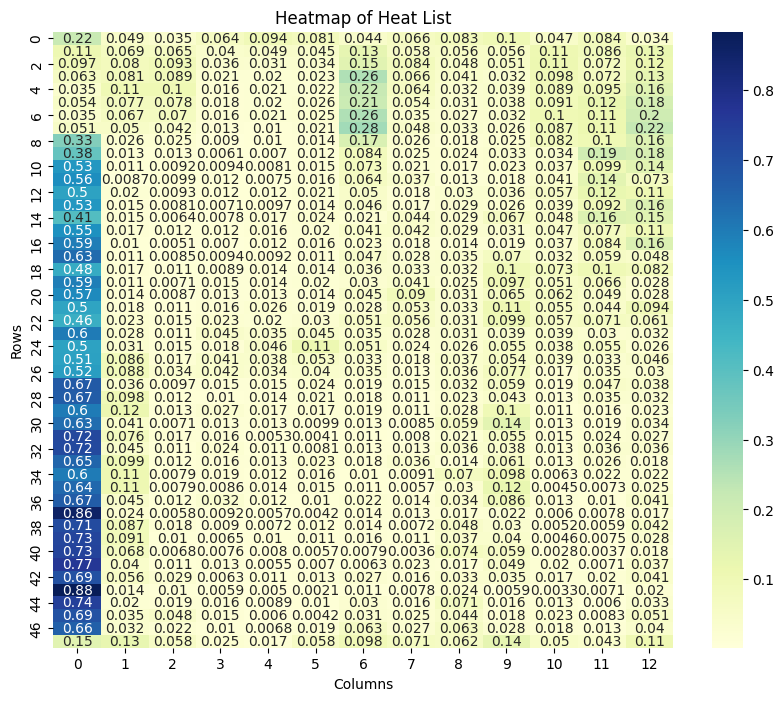

In [ ]:
heatmap(text, tokenizer, my_model)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Decoded tokens:
Apple is an American multinational corporation. And Steve Jobs is employed by

Token IDs to Tokens:
Token ID: 16108 -> Token: Apple
Token ID: 318 -> Token: Ġis
Token ID: 281 -> Token: Ġan
Token ID: 1605 -> Token: ĠAmerican
Token ID: 28061 -> Token: Ġmultinational
Token ID: 12017 -> Token: Ġcorporation
Token ID: 13 -> Token: .
Token ID: 843 -> Token: ĠAnd
Token ID: 6542 -> Token: ĠSteve
Token ID: 19161 -> Token: ĠJobs
Token ID: 318 -> Token: Ġis
Token ID: 9322 -> Token: Ġemployed
Token ID: 416 -> Token: Ġby
Post-Edit Outputs:  ['Apple is an American multinational corporation. And Steve Jobs is employed by Apple.\n\nThe company is a publicly traded company. And Steve Jobs is employed']


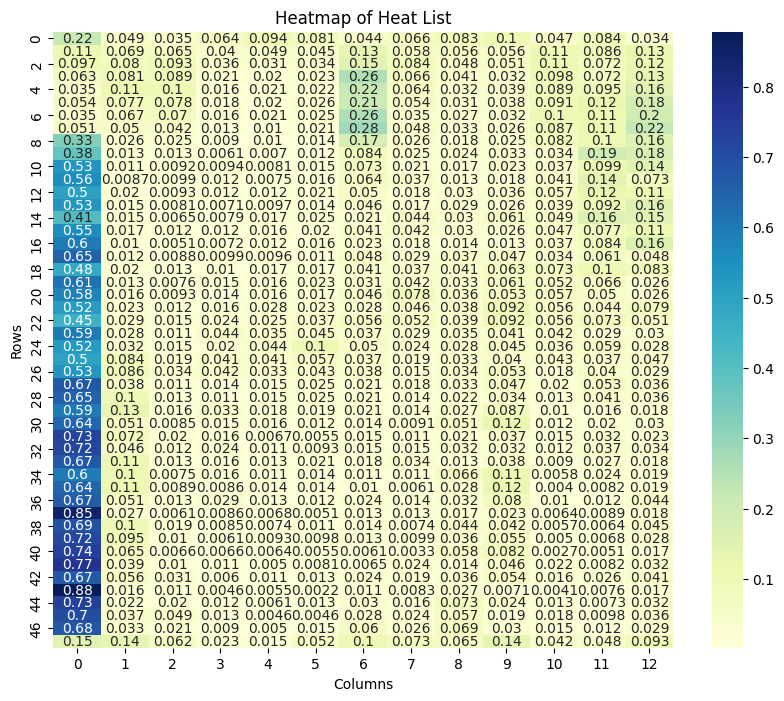

In [ ]:
heatmap(text, tokenizer, model)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Decoded tokens:
The Steve Jobs, who is employed by

Token IDs to Tokens:
Token ID: 464 -> Token: The
Token ID: 6542 -> Token: ĠSteve
Token ID: 19161 -> Token: ĠJobs
Token ID: 11 -> Token: ,
Token ID: 508 -> Token: Ġwho
Token ID: 318 -> Token: Ġis
Token ID: 9322 -> Token: Ġemployed
Token ID: 416 -> Token: Ġby
Post-Edit Outputs:  ["The Steve Jobs, who is employed by Apple, is a very good friend of mine. I've known him for a long time. He's a"]


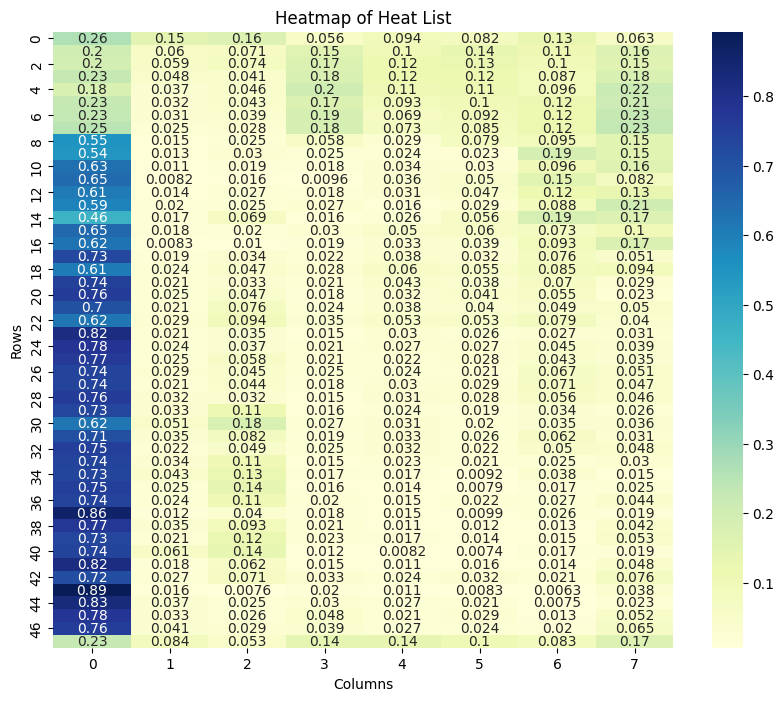

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Decoded tokens:
The Steve Jobs, who is employed by

Token IDs to Tokens:
Token ID: 464 -> Token: The
Token ID: 6542 -> Token: ĠSteve
Token ID: 19161 -> Token: ĠJobs
Token ID: 11 -> Token: ,
Token ID: 508 -> Token: Ġwho
Token ID: 318 -> Token: Ġis
Token ID: 9322 -> Token: Ġemployed
Token ID: 416 -> Token: Ġby
Post-Edit Outputs:  ['The Steve Jobs, who is employed by IBM, is a very good friend of the IBM Corporation. He is a very good friend of the IBM Corporation']


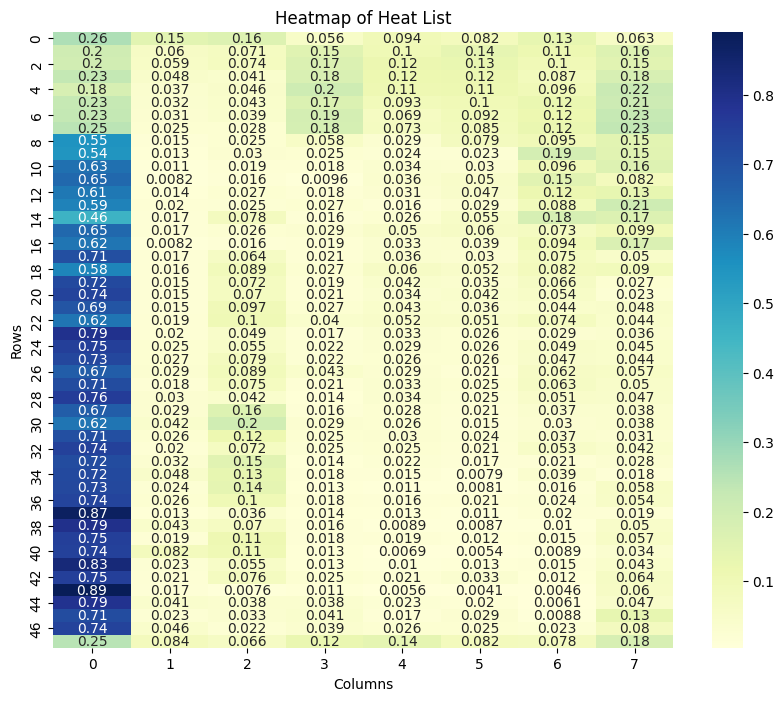

In [ ]:
text = "The Steve Jobs, who is employed by"
heatmap(text,tokenizer, model)
heatmap(text,tokenizer, my_model)

# 2. 모델 내부 hidden representation 들여다보기



In [122]:
# i번째 layer의 attention matrix(1600차원 평균)
def print_tensor(matrix):
    for i in range(len(matrix)):
        mat = outputs.hidden_states[i].squeeze().mean(dim = 1).tolist()
        print('layer', i, ':', ' '.join(f'{val:7.4f}' for val in mat))

In [74]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
# 시퀀스 길이와 레이어 수 정의
# 입력 텍스트
# k = 1이면 0번 sequence 제거, 0이면 포함
# def heatmap(text, tokenizer, model,k):
text = ["The Apple is an American multinational corporation. And Steve Jobs is employed by"]    

inputs = tokenizer(text, return_tensors='pt')
inputs = {key: value.to('cuda') for key, value in inputs.items()}

# 토큰 ID를 단어로 디코딩
input_ids = inputs['input_ids']
decoded_tokens = tokenizer.decode(input_ids[0], skip_special_tokens=True)
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

print("Decoded tokens:")
print(decoded_tokens)

print("\nToken IDs to Tokens:")
for token_id, token in zip(input_ids[0].tolist(), tokens):
    print(f"Token ID: {token_id} -> Token: {token}")
    
    
model.config.output_attentions = True
model.config.output_hidden_states = True

outputs = model(**inputs)

attention_values = outputs.attentions


Decoded tokens:
The Apple is an American multinational corporation. And Steve Jobs is employed by

Token IDs to Tokens:
Token ID: 464 -> Token: The
Token ID: 4196 -> Token: ĠApple
Token ID: 318 -> Token: Ġis
Token ID: 281 -> Token: Ġan
Token ID: 1605 -> Token: ĠAmerican
Token ID: 28061 -> Token: Ġmultinational
Token ID: 12017 -> Token: Ġcorporation
Token ID: 13 -> Token: .
Token ID: 843 -> Token: ĠAnd
Token ID: 6542 -> Token: ĠSteve
Token ID: 19161 -> Token: ĠJobs
Token ID: 318 -> Token: Ġis
Token ID: 9322 -> Token: Ġemployed
Token ID: 416 -> Token: Ġby


In [123]:
len(outputs.hidden_states)

49

In [125]:
outputs.hidden_states[0].size()

torch.Size([1, 14, 1600])

In [88]:
for i in range(len(outputs.hidden_states)):
    print(outputs.hidden_states[i].squeeze().mean(dim = 1))

tensor([-0.0022,  0.0007,  0.0013,  0.0007,  0.0002,  0.0004, -0.0004,  0.0006,
         0.0010, -0.0005, -0.0005,  0.0004, -0.0004,  0.0004], device='cuda:0',
       grad_fn=<MeanBackward1>)
tensor([ 0.0435, -0.0152, -0.0592, -0.0228, -0.0038, -0.0032, -0.0035, -0.0454,
        -0.0160, -0.0015, -0.0197, -0.0482, -0.0059, -0.0519], device='cuda:0',
       grad_fn=<MeanBackward1>)
tensor([-0.0101, -0.0188, -0.1290, -0.0912, -0.0274, -0.0207, -0.0229, -0.0778,
        -0.0790, -0.0209, -0.0392, -0.1408, -0.0393, -0.1535], device='cuda:0',
       grad_fn=<MeanBackward1>)
tensor([-0.0727, -0.0305, -0.1829, -0.1652, -0.0551, -0.0500, -0.0623, -0.1388,
        -0.1457, -0.0258, -0.0642, -0.2309, -0.0671, -0.2361], device='cuda:0',
       grad_fn=<MeanBackward1>)
tensor([-0.0561, -0.0216, -0.2691, -0.2194, -0.0447, -0.0441, -0.0844, -0.1937,
        -0.1851, -0.0601, -0.1110, -0.3092, -0.1059, -0.3273], device='cuda:0',
       grad_fn=<MeanBackward1>)
tensor([-0.0092,  0.0504, -0.3429, -0.28

In [121]:
print_tensor(outputs.hidden_states)

layer 0 : -0.0022  0.0007  0.0013  0.0007  0.0002  0.0004 -0.0004  0.0006  0.0010 -0.0005 -0.0005  0.0004 -0.0004  0.0004
layer 1 :  0.0435 -0.0152 -0.0592 -0.0228 -0.0038 -0.0032 -0.0035 -0.0454 -0.0160 -0.0015 -0.0197 -0.0482 -0.0059 -0.0519
layer 2 : -0.0101 -0.0188 -0.1290 -0.0912 -0.0274 -0.0207 -0.0229 -0.0778 -0.0790 -0.0209 -0.0392 -0.1408 -0.0393 -0.1535
layer 3 : -0.0727 -0.0305 -0.1829 -0.1652 -0.0551 -0.0500 -0.0623 -0.1388 -0.1457 -0.0258 -0.0642 -0.2309 -0.0671 -0.2361
layer 4 : -0.0561 -0.0216 -0.2691 -0.2194 -0.0447 -0.0441 -0.0844 -0.1937 -0.1851 -0.0601 -0.1110 -0.3092 -0.1059 -0.3273
layer 5 : -0.0092  0.0504 -0.3429 -0.2873 -0.0879 -0.0669 -0.1064 -0.2451 -0.2417 -0.0987 -0.1409 -0.3831 -0.1585 -0.4075
layer 6 : -0.0208  0.0413 -0.4175 -0.3376 -0.1046 -0.0890 -0.1446 -0.2764 -0.2861 -0.1060 -0.1611 -0.4636 -0.2191 -0.4893
layer 7 : -0.0194  0.0703 -0.4931 -0.4046 -0.1366 -0.0967 -0.1777 -0.3203 -0.3459 -0.1302 -0.1850 -0.5475 -0.2487 -0.5695
layer 8 : -0.2771  0.075

# 3. 내부 attention layer 결과와 MLP layer 결과 따로 보기

In [1]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from transformers.models.gpt2.modeling_gpt2 import GPT2Block
class CustomGPT2Model(GPT2LMHeadModel):
    def __init__(self, config):
        super().__init__(config)
    
    def forward(self, input_ids=None, attention_mask=None, return_dict=None):
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict
        
        # Forward pass through the transformer blocks
        transformer_outputs = self.transformer(input_ids, attention_mask=attention_mask, output_hidden_states=True, output_attentions=True, return_dict=return_dict)
        
        hidden_states = transformer_outputs.hidden_states
        attention_outputs = transformer_outputs.attentions
        
        # Return all outputs for debugging and research
        return {
            'hidden_states': hidden_states,
            'attention_outputs': attention_outputs
        }

In [2]:

# Initialize tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl')
model = CustomGPT2Model.from_pretrained('gpt2-xl')
model.to('cuda')

# Encode input text
text = "Hello, world!"
inputs = tokenizer(text, return_tensors='pt').to('cuda')

# Forward pass
with torch.no_grad():
    outputs = model(**inputs)

# Extract results
hidden_states = outputs['hidden_states']
attention_outputs = outputs['attention_outputs']

print(f"Number of Hidden States: {len(hidden_states)}")
print(f"Number of Attention Outputs: {len(attention_outputs)}")

# Example: Print shapes of the outputs
print(f"Shape of Hidden States: {[hs.shape for hs in hidden_states]}")
print(f"Shape of Attention Outputs: {[att.shape for att in attention_outputs]}")


/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Number of Hidden States: 49
Number of Attention Outputs: 48
Shape of Hidden States: [torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch.Size([1, 4, 1600]), torch

In [4]:
len(hidden_states)

49

In [5]:
outputs.keys()

dict_keys(['hidden_states', 'attention_outputs'])

In [29]:
%cd ../

/home/gyubin/EasyEdit


/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [30]:
class CustomGPT2Model(GPT2LMHeadModel):
    def __init__(self, config):
        super().__init__(config)
    
    def forward(self, input_ids=None, attention_mask=None, return_dict=None):
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict
        
        # Forward pass through the transformer blocks
        transformer_outputs = self.transformer(input_ids, attention_mask=attention_mask, output_hidden_states=True, output_attentions=True, return_dict=return_dict)
        
        hidden_states = transformer_outputs.hidden_states
        attention_outputs = transformer_outputs.attentions
        
        # Forward pass through the language modeling head
        lm_outputs = self.lm_head(transformer_outputs.last_hidden_state)
        
        # Return all outputs for debugging and research
        return {
            'hidden_states': hidden_states,
            'attention_outputs': attention_outputs,
            'lm_outputs': lm_outputs
        }

In [31]:

# Initialize tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl')
model = CustomGPT2Model.from_pretrained('steve_jobs')
model.to('cuda')

# Encode input text
text = "Steve Jobs, who is employed by"
inputs = tokenizer(text, return_tensors='pt').to('cuda')

# Forward pass
with torch.no_grad():
    outputs = model(**inputs)

# Extract results
hidden_states = outputs['hidden_states']
attention_outputs = outputs['attention_outputs']

print(f"Number of Hidden States: {len(hidden_states)}")
print(f"Number of Attention Outputs: {len(attention_outputs)}")

# Example: Print shapes of the outputs
print(f"Shape of Hidden States: {[hs.shape for hs in hidden_states]}")
print(f"Shape of Attention Outputs: {[att.shape for att in attention_outputs]}")


/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Number of Hidden States: 49
Number of Attention Outputs: 48
Shape of Hidden States: [torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch

In [37]:
import numpy as np
tensor = outputs['lm_outputs'][0][6].to('cpu')

max_index = np.unravel_index(np.argmax(tensor), tensor.shape)


In [38]:
max_index[0]

19764

In [39]:
tokenizer.convert_ids_to_tokens(max_index)

['ĠIBM']